In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("Data/melb_data.csv")

df_shape_r, df_shape_col = df.shape
print(f"shape of df: {df.shape}")
df.head(5)

shape of df: (13580, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [28]:
df = df.dropna(axis=0)

print(f"{df_shape_r - df.shape[0]} row removed!")
df.head(5)

7384 row removed!


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [35]:
df_cols = df.columns
print(f"df columns is: {df_cols}")

df_feature = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

df columns is: Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [52]:
X = df[df_feature]
X.head(5)

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [53]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [103]:
y = df["Price"]
y.head(5)

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64

In [104]:
print(y.describe())

count    6.196000e+03
mean     1.068828e+06
std      6.751564e+05
min      1.310000e+05
25%      6.200000e+05
50%      8.800000e+05
75%      1.325000e+06
max      9.000000e+06
Name: Price, dtype: float64


In [105]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)
model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [106]:
print("Making predictions for the following 5 houses:")
print(X.head(5))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954


In [115]:
print("The predictions are")

price_predict = model.predict(X)
print(price_predict[0:5])

The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [116]:
print(f"True value of price is:\n{y[0:5]}")

True value of price is:
1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64


Text(0.5, 0, 'Price')

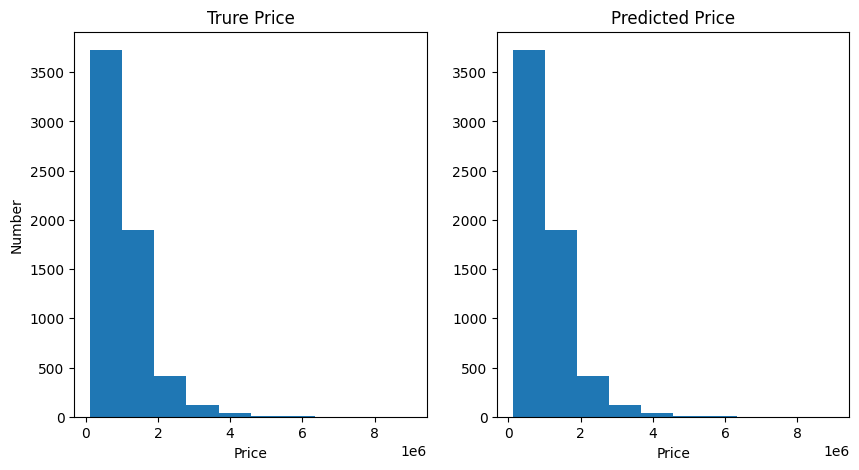

In [117]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(y)
plt.title("Trure Price")
plt.xlabel("Price")
plt.ylabel("Number")

plt.subplot(1, 2, 2)
plt.hist(price_predict)
plt.title("Predicted Price")
plt.xlabel("Price")

In [118]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y, price_predict)
print(f"Mean Absolute Error is: {MAE}")

Mean Absolute Error is: 1115.7467183128902


In [174]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, random_state=1, shuffle=True)
print(f"train_X size: {train_X.shape}")
print(f"val_X size: {val_X.shape}")

train_X size: (4956, 5)
val_X size: (1240, 5)


In [175]:
model_new = DecisionTreeRegressor(random_state=1)
house_price_predict = model_new.fit(train_X, train_y)
house_price_predict

DecisionTreeRegressor(random_state=1)

In [176]:
val_predict = model_new.predict(val_X)
print(f"MAE: {mean_absolute_error(val_y, val_predict)}")

MAE: 251800.79193548387


In [190]:
def get_MAE(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    pred_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, pred_val)
    
    return mae

In [231]:
# %matplotlib inline

Node: 2 	 MAE: 420815.61178284814
Node: 7 	 MAE: 339941.9379824672
Node: 12 	 MAE: 304885.13917549513
Node: 17 	 MAE: 301081.0146667651
Node: 22 	 MAE: 288669.58364722104
Node: 27 	 MAE: 278900.5463816748
Node: 32 	 MAE: 273957.6259038491
Node: 37 	 MAE: 274400.66397270944
Node: 42 	 MAE: 271736.9214599779
Node: 47 	 MAE: 263964.48678657925
Node: 52 	 MAE: 257748.6060082427
Node: 57 	 MAE: 256259.12662277778
Node: 62 	 MAE: 251851.5844281256
Node: 67 	 MAE: 249854.40555271055
Node: 72 	 MAE: 251097.079358922
Node: 77 	 MAE: 250845.56739455275
Node: 82 	 MAE: 249140.95708710162
Node: 87 	 MAE: 246995.7229923909
Node: 92 	 MAE: 248846.49569987232
Node: 97 	 MAE: 247166.63451459436
Node: 102 	 MAE: 249007.38513332626
Node: 107 	 MAE: 248474.3338686183
Node: 112 	 MAE: 246803.28261473146
Node: 117 	 MAE: 243227.5836392244
Node: 122 	 MAE: 242379.20744077495
Node: 127 	 MAE: 241566.08726515117
Node: 132 	 MAE: 242894.16985768272
Node: 137 	 MAE: 241651.81655507136
Node: 142 	 MAE: 240751.01

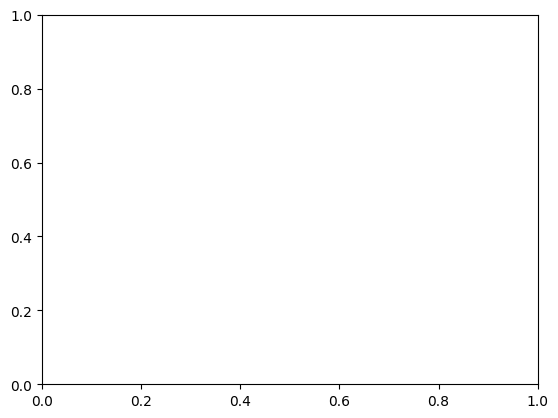

In [235]:
nodes = np.arange(2, 200, 5)
MAE = []

for i in nodes:
    MAE.append(get_MAE(i, train_X, val_X, train_y, val_y))
    print(f"Node: {i} \t MAE: {MAE[-1]}")
    plt.plot(i, MAE[-1], "o-", color='black', markerfacecolor='red', markersize=6, alpha=0.5, label="MAE")
    plt.title("Mean Absolute Error")
    plt.xlabel("Node")
    plt.ylabel("MAE")
    plt.legend()
    plt.cla()

# plt.plot(nodes, MAE, "o-", color='black', markerfacecolor='red', markersize=6, alpha=0.5, label="MAE")
# plt.title("Mean Absolute Error")
# plt.xlabel("Node")
# plt.ylabel("MAE")
# plt.legend()